In [6]:
#https://pypi.org/project/tfswin/
#Keras (TensorFlow v2) reimplementation of Swin Transformer and Swin Transformer V2 models.
!pip install tfswin

In [7]:
import tensorflow as tf
from keras import layers, models
from tfswin import SwinTransformerTiny224, preprocess_input

In [8]:
inputs = layers.Input(shape=(224, 224, 3), dtype='uint8')
outputs = layers.Lambda(preprocess_input)(inputs)
outputs = SwinTransformerTiny224(include_top=False)(outputs)
outputs = layers.Dense(100, activation='softmax')(outputs)

model = models.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 swin_tiny_224 (Functional)  (None, None, None, 768)   27519354  
                                                                 
 dense_1 (Dense)             (None, 7, 7, 100)         76900     
                                                                 
Total params: 27596254 (105.27 MB)
Trainable params: 27596254 (105.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


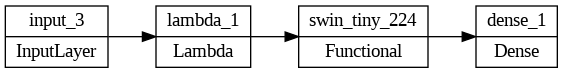

In [10]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)